In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
import cv2
from sklearn.metrics import classification_report

In [2]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 40s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [26]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 128)        

In [28]:
model.fit(x_train,y_cat_train,batch_size=128,epochs=20)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Epoch 1/20
391/391 [==============================] - 205s 464ms/step - loss: 4.3102 - accuracy: 0.0508
Epoch 2/20
391/391 [==============================] - 178s 457ms/step - loss: 3.3008 - accuracy: 0.2107
Epoch 3/20
391/391 [==============================] - 170s 434ms/step - loss: 2.8049 - accuracy: 0.3052
Epoch 4/20
391/391 [==============================] - 166s 425ms/step - loss: 2.4296 - accuracy: 0.3824
Epoch 5/20
391/391 [==============================] - 171s 436ms/step - loss: 2.1129 - accuracy: 0.4529
Epoch 6/20
391/391 [==============================] - 167s 428ms/step - loss: 1.8572 - accuracy: 0.5056
Epoch 7/20
391/391 [==============================] - 169s 432ms/step - loss: 1.6150 - accuracy: 0.5647
Epoch 8/20
391/391 [==============================] - 168s 428ms/step - loss: 1.4111 - accuracy: 0.6112
Epoch 9/20
391/391 [==============================] - 169s 433ms/step - loss: 1.2387 - accuracy: 0.6510
Epoch 10/20
391/391 [==============================] - 167s 428m

In [29]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 9s 26ms/step - loss: 2.8057 - accuracy: 0.4627


[2.8057377338409424, 0.4627000093460083]

In [30]:
model.save('cifar_100.h5')

In [34]:
predictions = model.predict_classes(x_test)

C:\Users\koppu\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       100
           1       0.54      0.57      0.55       100
           2       0.37      0.37      0.37       100
           3       0.35      0.23      0.28       100
           4       0.28      0.41      0.33       100
           5       0.34      0.28      0.31       100
           6       0.50      0.50      0.50       100
           7       0.56      0.50      0.53       100
           8       0.69      0.46      0.55       100
           9       0.54      0.61      0.57       100
          10       0.25      0.39      0.30       100
          11       0.33      0.27      0.30       100
          12       0.49      0.46      0.48       100
          13       0.34      0.39      0.36       100
          14       0.43      0.40      0.41       100
          15       0.51      0.37      0.43       100
          16       0.46      0.41      0.43       100
          17       0.63    

Prediction 1 (Landline phone)

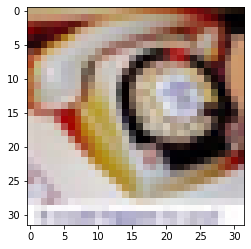

In [82]:
plt.imshow(x_train[5])

In [83]:
y_train[5]

array([86])

In [84]:
test_img1 = cv2.imread("cifar_100_test1.jpg")
print(test_img1.shape) # Need to match x_test.shape = (10000,32,32,3)
test_img1 = test_img1.reshape(1,32,32,3)
test_img1.shape

(32, 32, 3)


(1, 32, 32, 3)

In [85]:
model.predict_classes(test_img1) # predicted correctly as landline phone

array([86], dtype=int64)

Prediction 2 (Keyboard)

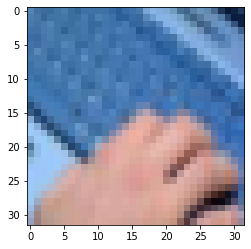

In [86]:
plt.imshow(x_train[10])

In [87]:
y_train[10]

array([39])

In [88]:
test_img2 = cv2.imread("cifar_100_test2.jpg")
print(test_img2.shape) # Need to match x_test.shape = (10000,32,32,3)
test_img2 = test_img2.reshape(1,32,32,3)
test_img2.shape

(32, 32, 3)


(1, 32, 32, 3)

In [89]:
model.predict_classes(test_img2) # Predicted properly as keyboard

array([39], dtype=int64)